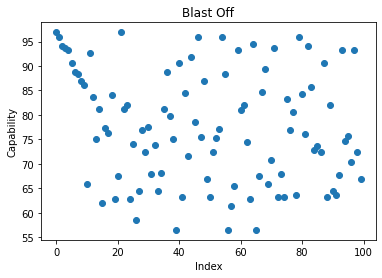

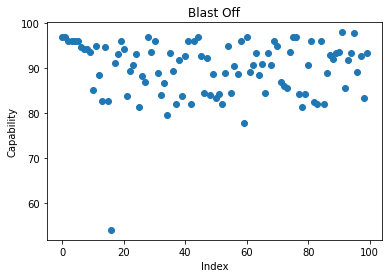

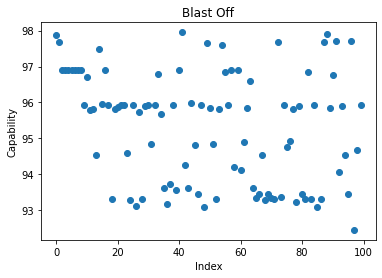

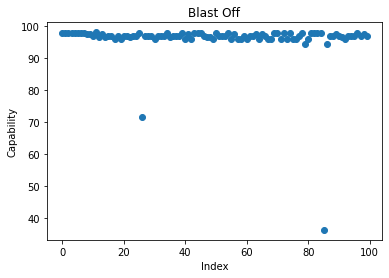

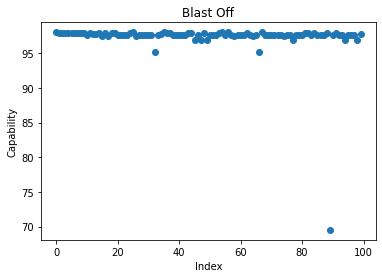

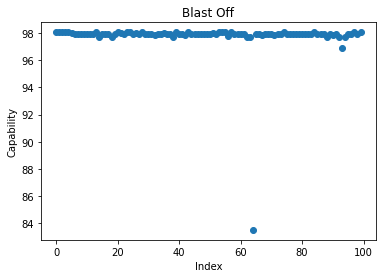

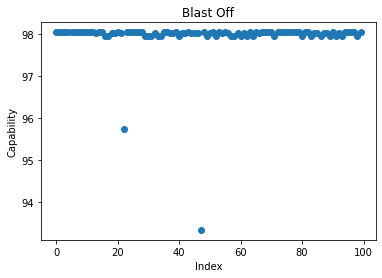

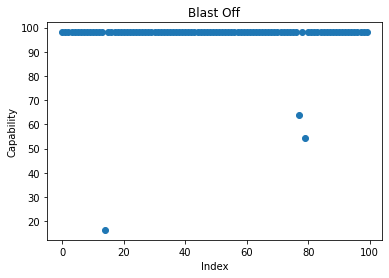

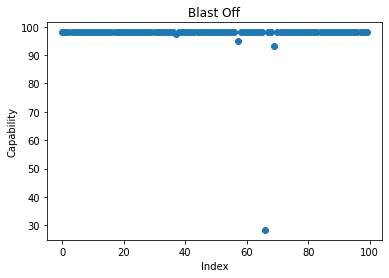

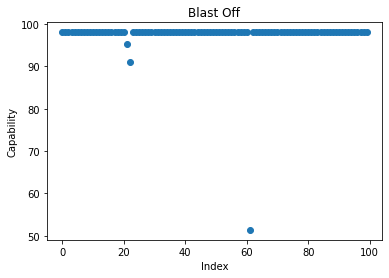

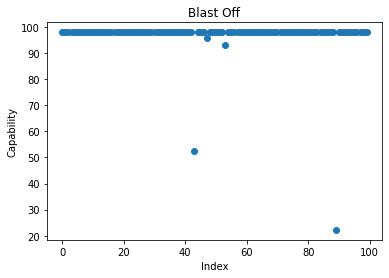

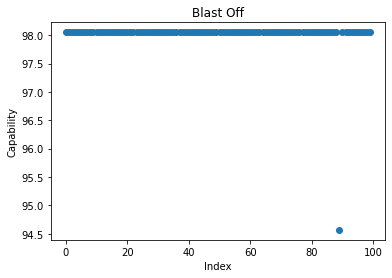

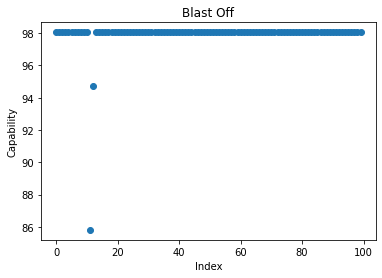

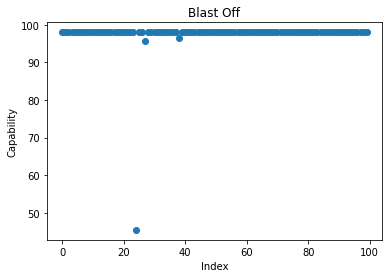

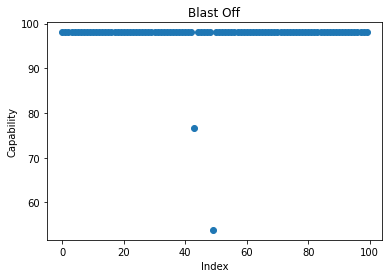

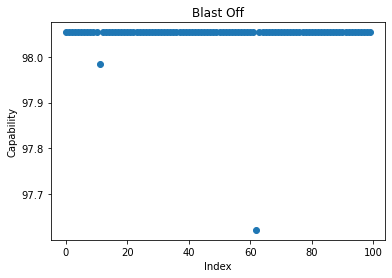

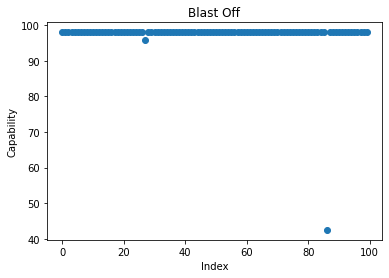

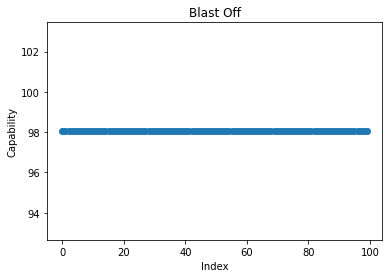

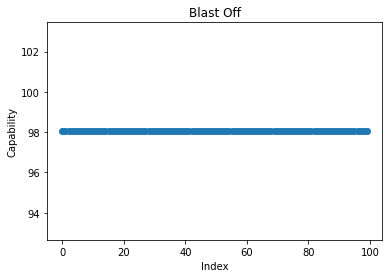

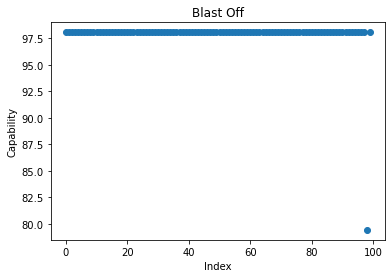

In [9]:
import random
import matplotlib.pyplot as plt
class Individual(object):
  def __init__(self,chromosome):
    self.chromosome=chromosome
    self.fitness=self.calc_fitness()
  @classmethod
  def mutateL(self):
    return random.uniform(0,5)
  @classmethod
  def mutateS(self):
    return random.uniform(0,95)
  @classmethod
  def create_gnome(self):
    chromosome=[self.mutateS(),self.mutateL()]
    return chromosome
  def calc_fitness(self):
    lu=self.chromosome[1]
    sk=self.chromosome[0]
    fitness=100-(lu+sk)
    return fitness
  def mate(self,parent2):
    cap=0
    for _ in range(2):
      n=random.random()
      if n<0.495:
        cap+=self.chromosome[_]
      elif n<0.99:
        cap+=parent2.chromosome[_]
      else:
        if _==0:
          cap+=self.mutateS()
        else:
          cap+=self.mutateL()
    L=cap*5/100
    S=cap*95/100
    return [S,L]
population=[]
for i in range(100):
  gnome=Individual.create_gnome()
  population.append(Individual(gnome))
generation=1
for j in range(20):
  population=sorted(population,key = lambda x:x.fitness)
  new_generation=[]
  new_generation.extend(population[:10])
  for k in range(90):
    parent1=random.choice(population[:50])
    parent2=random.choice(population[:50])
    child=parent1.mate(parent2)
    new_generation.append(Individual(child))
  population=new_generation
  index=[]
  capab=[]
  for h in range(len(population)):
    index.append(h)
    l=population[h].chromosome[0]
    s=population[h].chromosome[1]
    capab.append(s+l)
  plt.scatter(index,capab)
  plt.xlabel('Index')
  plt.ylabel('Capability')
  plt.title('Blast Off')
  plt.show()
  generation+=1


